## Trend Analysis and understanding the % variation of a property is crucial for both buyers and sellers. 
### In this notebook, I will try to understand the % fluctualtion Year over Year.

### Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

###  Loading csv data

In [2]:
all_home_prices =pd.read_csv('/kaggle/input/zillow-home-value-index/ZHVI.csv')

In [3]:
all_home_prices.head()

,Unnamed: 0,Virginia,California,Florida,New York,New Jersey,Texas,Michigan,Massachusetts,Arizona,...,Kentucky,Missouri,Kansas,Delaware,Wyoming,Oklahoma,South Dakota,Nebraska,Iowa,Ohio
0,2000-01-01,122268.193859,186449.090913,105939.099867,150532.342593,167433.047753,111018.278532,113111.645859,191582.679106,133988.259586,...,84366.296586,94511.431926,86000.758305,144664.050906,NaN,79848.729013,106141.501276,112363.747584,88148.695499,103304.588561
1,2000-02-01,122584.578966,187075.801959,106168.573819,151068.385602,167884.388497,111078.608733,113173.945053,192222.309941,134230.951715,...,84409.854490,94622.206606,86017.640416,144889.114969,NaN,79881.666817,105915.985652,112543.365679,88317.143517,103367.717036
2,2000-03-01,122920.021448,187922.015335,106446.741990,151584.413444,168315.047081,111107.869825,113402.026693,192983.369702,134543.300942,...,84489.106316,94788.054284,86117.100292,145169.339985,NaN,80035.200471,105600.393222,112709.838619,88476.165508,103463.454714
3,2000-04-01,123553.896176,189758.892258,107012.186335,152694.249050,169269.184924,111253.095221,113856.364422,194482.336514,135181.100062,...,84686.054351,95167.144850,86265.785885,145810.208250,NaN,80314.777206,105175.008474,112968.255134,88819.648656,103744.975977
4,2000-05-01,124165.832795,191893.984972,107621.957129,153842.532171,170241.853435,111347.145464,114526.379974,196104.894267,135904.054386,...,84947.803755,95656.819992,86489.916103,146541.147029,NaN,80690.292238,104998.035988,113099.300600,89199.144497,104174.225895


In [4]:
all_home_prices.shape

(300, 52)

In [5]:
all_home_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                300 non-null    object 
 1   Virginia                  300 non-null    float64
 2   California                300 non-null    float64
 3   Florida                   300 non-null    float64
 4   New York                  300 non-null    float64
 5   New Jersey                300 non-null    float64
 6   Texas                     300 non-null    float64
 7   Michigan                  300 non-null    float64
 8   Massachusetts             300 non-null    float64
 9   Arizona                   299 non-null    float64
 10  Washington                300 non-null    float64
 11  Colorado                  300 non-null    float64
 12  Illinois                  300 non-null    float64
 13  the District of Columbia  300 non-null    float64
 14  Nevada    

Based on the data, we see that it's a cleaned data, no nulls.

### Replacing the column name from 'Unnamed: 0' to 'Duration'

In [6]:
all_home_prices.rename(columns={'Unnamed: 0': 'Duration'}, inplace=True)

In [7]:
all_home_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Duration                  300 non-null    object 
 1   Virginia                  300 non-null    float64
 2   California                300 non-null    float64
 3   Florida                   300 non-null    float64
 4   New York                  300 non-null    float64
 5   New Jersey                300 non-null    float64
 6   Texas                     300 non-null    float64
 7   Michigan                  300 non-null    float64
 8   Massachusetts             300 non-null    float64
 9   Arizona                   299 non-null    float64
 10  Washington                300 non-null    float64
 11  Colorado                  300 non-null    float64
 12  Illinois                  300 non-null    float64
 13  the District of Columbia  300 non-null    float64
 14  Nevada    

In [8]:
# Convert 'Duration' to datetime format and add index for faster retrival
all_home_prices['Duration'] = pd.to_datetime(all_home_prices['Duration'], format='%Y-%m-%d')
all_home_prices.set_index('Duration', inplace=True)

In [9]:
all_home_prices.head()

,Virginia,California,Florida,New York,New Jersey,Texas,Michigan,Massachusetts,Arizona,Washington,...,Kentucky,Missouri,Kansas,Delaware,Wyoming,Oklahoma,South Dakota,Nebraska,Iowa,Ohio
Duration,,,,,,,,,,,,,,,,,,,,,
2000-01-01,122268.193859,186449.090913,105939.099867,150532.342593,167433.047753,111018.278532,113111.645859,191582.679106,133988.259586,171952.714474,...,84366.296586,94511.431926,86000.758305,144664.050906,NaN,79848.729013,106141.501276,112363.747584,88148.695499,103304.588561
2000-02-01,122584.578966,187075.801959,106168.573819,151068.385602,167884.388497,111078.608733,113173.945053,192222.309941,134230.951715,172340.577764,...,84409.854490,94622.206606,86017.640416,144889.114969,NaN,79881.666817,105915.985652,112543.365679,88317.143517,103367.717036
2000-03-01,122920.021448,187922.015335,106446.741990,151584.413444,168315.047081,111107.869825,113402.026693,192983.369702,134543.300942,172736.232853,...,84489.106316,94788.054284,86117.100292,145169.339985,NaN,80035.200471,105600.393222,112709.838619,88476.165508,103463.454714
2000-04-01,123553.896176,189758.892258,107012.186335,152694.249050,169269.184924,111253.095221,113856.364422,194482.336514,135181.100062,173534.765972,...,84686.054351,95167.144850,86265.785885,145810.208250,NaN,80314.777206,105175.008474,112968.255134,88819.648656,103744.975977
2000-05-01,124165.832795,191893.984972,107621.957129,153842.532171,170241.853435,111347.145464,114526.379974,196104.894267,135904.054386,174406.314662,...,84947.803755,95656.819992,86489.916103,146541.147029,NaN,80690.292238,104998.035988,113099.300600,89199.144497,104174.225895


### Explanation of formula used to calculate YoY

#### Given Data:

* feb_2020_price: Price in February 2020 (547607.8042)
* jan_2020_price: Price in January 2020 (545361.7393)

### Formula:

The formula for YoY percentage change is:
YoY Change = ((Current Month Price - Previous Month Price) / Previous Month Price) * 100


### Calculation:

Calculate the price difference:
Price Difference = February 2020 Price - January 2020 Price
Price Difference = 547607.8042 - 545361.7393
Price Difference = 2246.0649

Calculate the YoY percentage change:
YoY Change = (Price Difference / January 2020 Price) * 100
YoY Change = (2246.0649 / 545361.7393) * 100
YoY Change = 0.4118%

['Hawaii', 'California', 'the District of Columbia', 'Massachusetts']
2020-01-01 00:00:00
              Hawaii  California  the District of Columbia  Massachusetts
Duration                                                                 
2020-01-01       NaN         NaN                       NaN            NaN
2020-02-01  0.398098    0.411849                  0.619240       0.559415
2020-03-01  0.384929    0.395169                  0.821636       0.695962
2020-04-01  0.303296    0.363459                  0.802765       0.603374
2020-05-01  0.043502    0.045739                  0.454920       0.358945
2020-06-01 -0.136272   -0.216583                  0.080803       0.160940
2020-07-01 -0.066043   -0.028010                  0.033166       0.184980
2020-08-01  0.328340    0.583877                  0.352862       0.566460
2020-09-01  0.776532    1.288705                  0.721959       1.079555
2020-10-01  0.962591    1.633733                  0.738079       1.421162
2020-11-01  1.131806  

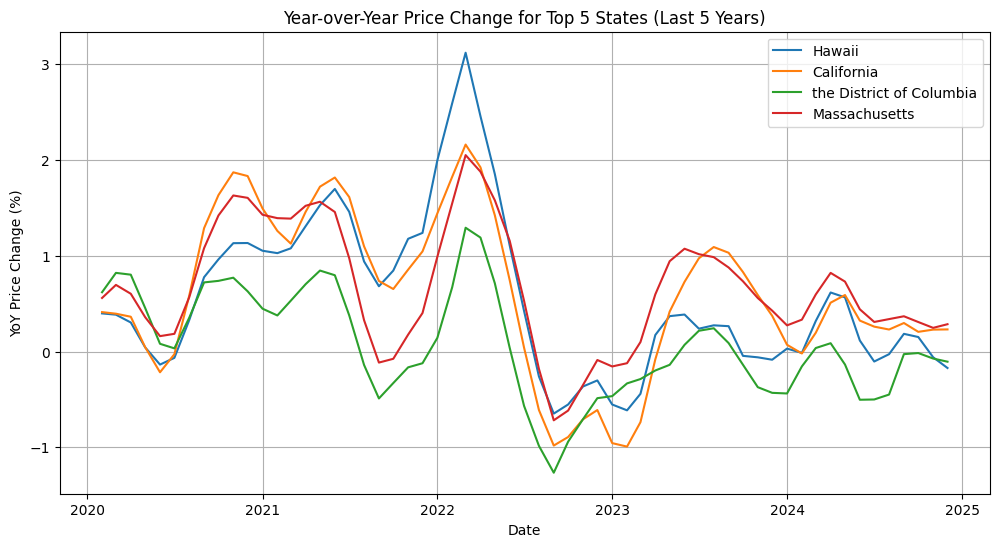

In [10]:
# Select the top 5 states with the highest average price appreciation 
top_states = all_home_prices.mean().sort_values(ascending=False).head(4).index.tolist()

# Check the top states
print(top_states) 

# Filter data for the last 5 years
start_date = all_home_prices.index[-60]  # Using monthly data for the last 5 years

print(start_date)

last_5_years_data = all_home_prices.loc[start_date:]

# Calculate year-over-year (YoY) percentage change for the last 5 years

df_pct_change_last_5 = last_5_years_data[top_states].pct_change() * 100
print(df_pct_change_last_5)

# Calculate year-over-year (YoY) percentage change for the last 5 years
df_pct_change_last_5 = last_5_years_data[top_states].pct_change() * 100


# Plot YoY price changes for the top 5 states for the last 10 years
plt.figure(figsize=(12, 6))
for state in top_states:
    plt.plot(df_pct_change_last_5[state], label=state)

# Add data labels to the plot
'''
for state in top_states:
    for x, y in zip(df_pct_change_last_5.index, df_pct_change_last_5[state]):
        plt.text(x, y, f'{y:.f}%', ha='center', va='bottom', fontsize=8)
'''


plt.title('Year-over-Year Price Change for Top 5 States (Last 5 Years)')
plt.xlabel('Date')
plt.ylabel('YoY Price Change (%)')
plt.legend()
plt.grid(True)
plt.show()


**What is CAGR (Compound Annual Growth Rate)?**

* **Definition:** CAGR is a financial metric that represents the average annualized rate of return of an investment over a specific period. 
* **Key Features:**
    * **Smoothed Rate:** CAGR provides a smoothed rate of return, even if the actual growth of the investment wasn't consistent year-over-year.
    * **Compounding:** CAGR assumes that any profits earned during each period are reinvested, allowing for compounding growth.
    * **Comparison Tool:** CAGR is used to compare the performance of different investments over the same time period.

**CAGR** is a valuable tool for real estate analysis because it provides a standardized measure of long-term growth. By understanding the historical CAGR of different markets and properties, investors can make more informed decisions about where and how to allocate their capital.


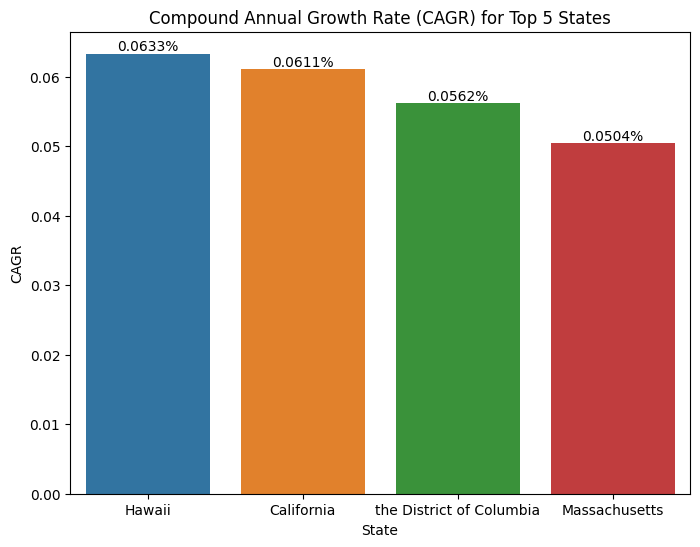

In [11]:
# Calculate compound annual growth rate (CAGR)
def calculate_cagr(start_value, end_value, years):
    return (end_value / start_value) ** (1 / years) - 1

start_year = all_home_prices.index[0].year
end_year = all_home_prices.index[-1].year
years = end_year - start_year

cagr = all_home_prices[top_states].iloc[-1] / all_home_prices[top_states].iloc[0]
cagr = cagr ** (1 / years) - 1


# Visualize CAGR with a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=top_states, y=cagr)

# Add data labels to the bars
for i, v in enumerate(cagr):
    plt.text(i, v, f'{v:.4f}%', ha='center', va='bottom', fontsize=10)

plt.title('Compound Annual Growth Rate (CAGR) for Top 5 States')
plt.xlabel('State')
plt.ylabel('CAGR')
plt.show()

## **Interpretation of the CAGR Values:**

The CAGR values represent the estimated average annual growth rate for housing prices in each of the listed states over the 5 year period in the analysis. 

* **Hawaii: 0.063296**
    - This translates to a CAGR of approximately 6.33%. 
    - It suggests that, on average, housing prices in Hawaii have increased by about 6.33% per year.

* **California: 0.061061**
    - This translates to a CAGR of approximately 6.11%.
    - It suggests that, on average, housing prices in California have increased by about 6.11% per year.

* **The District of Columbia: 0.056205**
    - This translates to a CAGR of approximately 5.62%.
    - It suggests that, on average, housing prices in the District of Columbia have increased by about 5.62% per year.

* **Massachusetts: 0.050402**
    - This translates to a CAGR of approximately 5.04%.
    - It suggests that, on average, housing prices in Massachusetts have increased by about 5.04% per year.

**Key Takeaways:**

* **Hawaii** shows the highest CAGR, indicating the strongest historical growth in housing prices among these states.
* **California** has the second-highest CAGR, suggesting a significant historical appreciation in housing values.
* **The District of Columbia** and **Massachusetts** also demonstrate strong historical growth, with CAGRs above 5%.
